# ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведием исследовательский анализ данных и установим параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

План работы состоит из следующих пунктов:
- изучение общей информации о данных
- предобработка данных, где выявляются пропущенные значения, неисправные данные, ошибки в формате, аномалии, неправильный синтаксис
- добавление новых столбцов в таблицу, которые пригодятся для дальнейшего анализа
- проведение исследовательского анализа, который является основным этапом. Сравнение показателей, определение зависимостей между ними, изучение параметров, влияющих на цену объектов.
- подведение резьтатов работы

### 1 Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd

try:
    df = pd.read_csv("C:/Users/Любовь/Downloads/real_estate_data.csv", sep = '\t')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep = '\t')
df.head() #выводим первые 5 строк таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
df.info() #выводим общую информацию на экран

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
shape_1 = df.shape #посчитаем количество строк и стобцов до фильтрации
shape_1

(23699, 22)

**Вывод**: из информации по датафрейму становится ясно, что во многих столбцах есть пропуски. Дальнейшая цель - разобраться с их природой и заменить значения.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

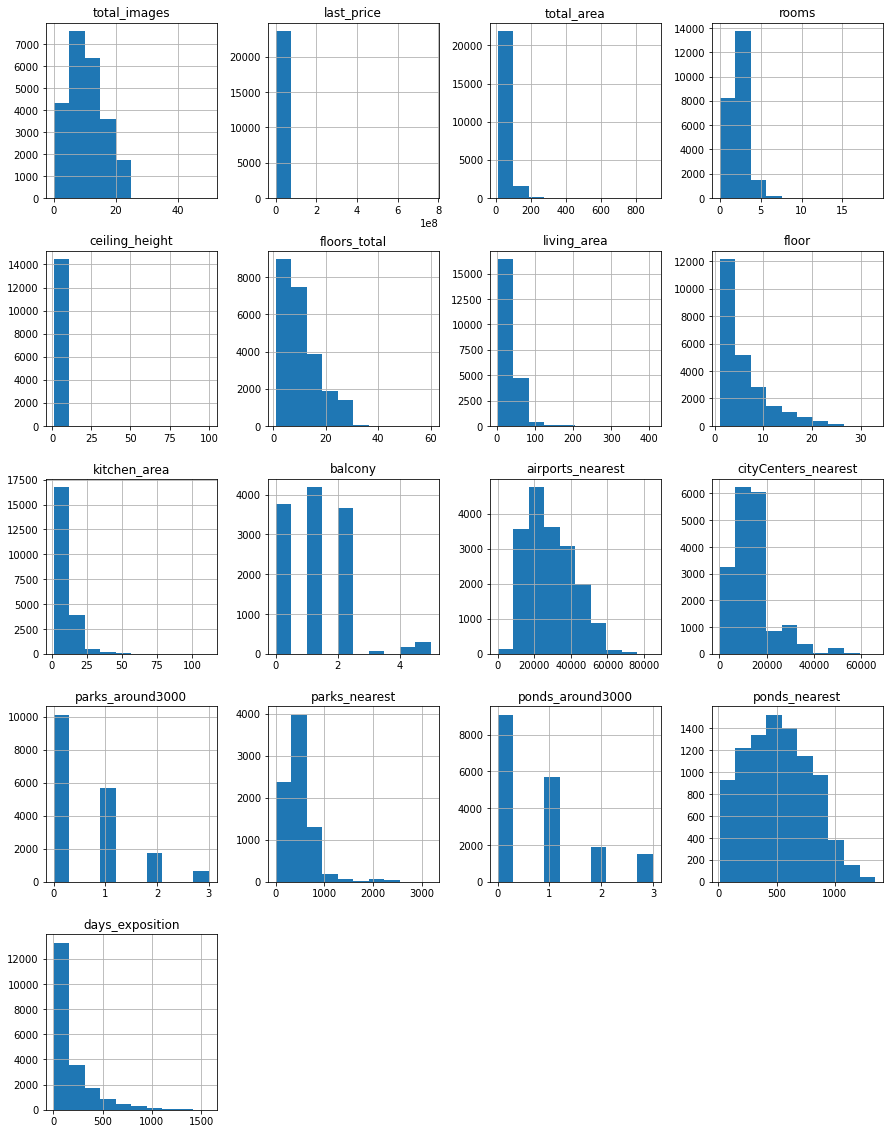

In [4]:
df.hist(figsize=(15,20)) #выводим гистограммы всех числовых столбцов датафрейма

**Вывод**: судя по гистограммам в данных есть аномальные значения. Однако на данном этапе какие-то выводы делать рано, поэтому начинаем предобработку данных.

### 2 Выполним предобработку данных

In [5]:
df.isna().sum() #находим столбцы с пропущенными значениями и считаем их сумму

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
df = df.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}) #переименовали название столбца в стиле змеиного регистра

In [7]:
df['last_price'] = df['last_price'].astype('int') #поменяли тип данных на целочисленный

In [8]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') #преобразовали столбец во временной формат

In [9]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median()) #заменили пропущенные значения в стобце на медианное значение
df.loc[df['ceiling_height'] >= 20.0, 'ceiling_height'] = df['ceiling_height']/10
df['ceiling_height'].sort_values(ascending=False).head(35)

15061    14.00
22309    10.30
22869    10.00
5863      8.30
17442     8.00
15743     8.00
3474      8.00
20264     6.00
21227     5.80
1388      5.60
7578      5.50
1026      5.30
12628     5.30
464       5.20
1053      5.00
21923     4.90
2802      4.80
19142     4.70
1300      4.70
12401     4.65
6802      4.50
14519     4.50
13224     4.50
10159     4.50
2823      4.50
9783      4.50
3067      4.50
8018      4.45
7521      4.45
6728      4.40
11651     4.40
7274      4.40
4201      4.37
10754     4.30
17078     4.25
Name: ceiling_height, dtype: float64

**Вывод**: в гистограмме по высоте потолков было видно, что присутствуют аномальные значения, поэтому вывели наибольшие значения в этой переменной на экран. Поскольку вряд ли в квартире будут потолки выше, чем 20 метров, можно предположить, что была пропущена точка в записи, поэтому разделим эти значения на 10. 

In [10]:
df.dropna(subset=['floors_total'], inplace=True) #удалили пропущенные значения, т.к. их мало
df['floors_total'] = df['floors_total'].astype('int')

In [11]:
df['living_area'].round(2) #оставляем 2 знака после запятой

0        51.0
1        18.6
2        34.3
3         NaN
4        32.0
         ... 
23694    73.3
23695    38.0
23696    29.7
23697     NaN
23698    12.3
Name: living_area, Length: 23613, dtype: float64

**Вывод**: пропуски в этом стобце я не трогала, т.к. заполнение их медианным значением будет неверно и исказит картину.

In [12]:
df['is_apartment'] = df['is_apartment'].fillna('False')
df['is_apartment'] = df['is_apartment'].astype('bool') #изменили на булев тип данных

**Вывод**: пустые значения в апартаментах были заменены на False, т.к., скорее всего, при заполнении анкеты эту строку пропускали, когда квартира не являлась аппартаментами.

In [13]:
part = df['total_area'].median()/df['kitchen_area'].median() #в отдельную переменную записываем отношение медианного значения общей площади к кухне
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area']/part) #заполняем пропсуки отношением общей площади к результату предыдущих действий
df['kitchen_area'].round(2) #оставляем 2 знака после запятой

0        25.00
1        11.00
2         8.30
3        27.82
4        41.00
         ...  
23694    13.83
23695     8.50
23696     9.92
23697    23.30
23698     9.00
Name: kitchen_area, Length: 23613, dtype: float64

In [14]:
df['balcony'] = df['balcony'].fillna(0) #заменили пропуски на ноль
df['balcony'] = df['balcony'].astype('int') #количество балконов перевели в целочисленную переменную

**Вывод**: если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски можно заменить на 0. 

In [15]:
df['locality_name'] = (
    df['locality_name']
    .str.lower()
    .str.replace('ё', 'е')
    .replace(['поселок', 'городской поселок', 'деревня', 'поселок городского типа', 'садовое товарищество', 'село', 'городской', 'городского типа', 'садоводческое некоммерческое товарищество','станции', 'при железнодорожной станции', 'пансионат', 'платформа', 'при железнодорожной', 'коттеджный'], '', regex=True)
) #привели все строки к нижнему регистру и оставили только названия населенных пунктов
df['locality_name'].unique() #перезаписали и вывели уникальные значения на экран

array(['санкт-петербург', ' шушары', '  янино-1', ' парголово', ' мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', ' кудрово',
       'коммунар', 'колпино', '  красный бор', 'гатчина', ' федоровское',
       'выборг', 'кронштадт', 'кировск', ' новое девяткино',
       ' металлострой', '  лебяжье', '  сиверский', ' молодцово',
       '  кузьмоловский', ' новая ропша', 'павловск', ' пикколово',
       'всеволожск', 'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       ' куттузи', ' аннино', '  ефимовский', ' плодовое', ' заклинье',
       ' торковичи', ' первомайское', 'красное ', ' понтонный',
       'сясьстрой', ' старая', ' лесколово', ' новый свет', 'сланцы',
       ' путилово', 'ивангород', 'мурино', 'шлиссельбург', 'никольское',
       'зеленогорск', 'сосновый бор', ' оржицы', ' кальтино', 'кудрово',
       ' романовка', ' бугры', '  рощино', 'кириши', 'луга', 'волосово',
       'отрадное', ' павлово', ' оредеж', ' копорье', ' молодежное',
       'тихвин', ' побед

In [16]:
df.dropna(subset=['locality_name'], inplace=True) #удалили пропуски

**Вывод**: пропуски в населенном пункте удаляем, т.к. таких значений мало. В переменных airports_nearest, city_centers_nearest, parks_nearest, ponds_nearest пропущенные значения возникли, вероятно, от того, что расстояние слишком большое. Такие пропуски я решила не изменять, чтобы в дальнейшем не возникало искажения результатов. В переменной days_exposition пропуски могут сигнализировать о том, что объявление еще актуально, поэтому данные также не меняла. Также не стала трогать переменные parks_around_3000, ponds_around_3000, т.к. в дальнейшем анализе они не участвуют.

In [17]:
df.isna().sum() #проверяем результаты предобработки данных

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

**Вывод**: в результате предобработки данных было выполнено несколько важных моментов.
1. Все стобцы стали иметь одинаковый стиль и прописаны в змеином регистре
2. Была найдена природа пропущенных значений - где это возможно они были логически заменены
3. Тип данных в стобцах был изменен на подходящий там, где это возможно
4. Найдены и устранены неявные дубликаты в переменной с названиями населенных пунктов

### 3 Добавим в таблицу новые столбцы

In [19]:
df['price_per_square_meter'] = df['last_price']/df['total_area']
df['price_per_square_meter'].round(2)

0        120370.37
1         82920.79
2         92785.71
3        408176.10
4        100000.00
           ...    
23694     72490.85
23695     52542.37
23696     44091.71
23697    149511.40
23698     41795.67
Name: price_per_square_meter, Length: 23565, dtype: float64

In [20]:
df['day_of_publication'] = df['first_day_exposition'].dt.weekday #добавили столбец с днем публикации

In [21]:
df['month_of_publication'] = df['first_day_exposition'].dt.month #добавили столбец с месяцем публикации

In [22]:
df['year_of_publication'] = df['first_day_exposition'].dt.year #добавили столбец с годом публикации

In [23]:
#создали собственную функию для определения типа этажа
def categorize_floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой' 

In [24]:
df['type_floor'] = df.apply(categorize_floor, axis=1) #добавили столбец

In [25]:
df['city_centers_nearest_km'] = (df['city_centers_nearest']/1000).round(0) #создали новый столбец и округлили значения до ближайших целых чисел

In [26]:
df.head() #выведем несколько строк измененного датасета

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_publication,month_of_publication,year_of_publication,type_floor,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,True,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0


**Вывод**: были созданы необходимые дополнительные столбцы для дальнейшей работы.

### 4 Проведем исследовательский анализ данных

#### 1. Изучим некоторые параметры объектов и построим отдельные гистограммы для каждого из этих параметров

In [27]:
df['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:title={'center':'зависисмость количесвта квартир в продаже от площади'}, ylabel='Frequency'>

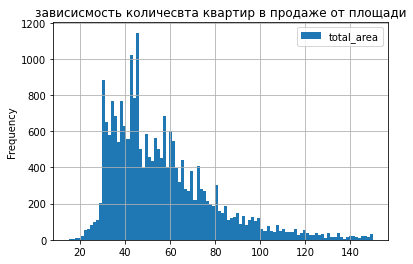

In [28]:
df.plot(kind='hist', y='total_area', ylabel='Кол-во квартир', xlabel='Квадратные метры', title='зависисмость количесвта квартир в продаже от площади', bins=100, range=(15,150), grid=True)

In [29]:
df = df.query('15 <= total_area <= 500') #оставляем срез со значениями меньше 500 квадратных метров

**Вывод**: исследуя гистограмму, можно сказать, что наибольшее предложение составляют квартиры, площадь которых находится в диапазоне от 30 до 65 квадратных метров. При этом пик находится около 45 квадратных метров. Также были отсечены значения, площадь которых составляет меньше 15 и больше 500 квадратных метров, так как количество таких квартир достаточно мало и я сочла это за аномалии. 

In [30]:
df['living_area'].describe()

count    21691.000000
mean        34.373986
std         21.439669
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        347.500000
Name: living_area, dtype: float64

<AxesSubplot:title={'center':'зависисмость количесвта квартир в продаже от жилой площади'}, ylabel='Frequency'>

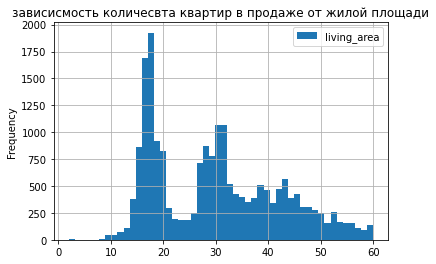

In [31]:
df.plot(kind='hist', y='living_area', title='зависисмость количесвта квартир в продаже от жилой площади', ylabel='Кол-во квартир', xlabel='Квадратные метры', bins=50, range=(2, 60), grid=True)

**Вывод**: исследуя гистограмму, можно сказать, что квартиры с жилой площадью около 15 и 30 квадратных метров являются самыми популярными для продажи. 

In [32]:
df['kitchen_area'].describe()

count    23552.000000
mean        10.486518
std          5.946439
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:title={'center':'зависисмость количесвта квартир в продаже от площади кухни'}, ylabel='Frequency'>

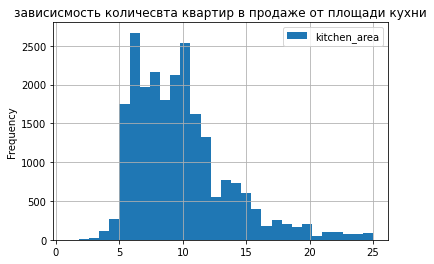

In [33]:
df.plot(kind='hist', y='kitchen_area', title='зависисмость количесвта квартир в продаже от площади кухни', ylabel='Кол-во квартир', xlabel='Квадратные метры', bins=30, range=(1, 25), grid=True)

In [34]:
df = df.query('3 < kitchen_area < 30') #оставляем срез со значениями от 3 до 30 квадратных метров

**Вывод**: исследуя гистограмму, можно сказать, что наибольшее количество предложений встречается у квартир с площадью кухни в диапазоне от 5 до 11 квадратных метров, при этом имеются спады предложений около 6 и 9 квадратных метров. Также были отсечены значения с площадью кухни, меньшей 3 и большей 30 квадратных метров, так как количество таких квартир достаточно мало и я сочла это за аномалии.

In [35]:
df['last_price'].describe()

count    2.311000e+04
mean     5.996183e+06
std      6.658979e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.600000e+06
max      4.013000e+08
Name: last_price, dtype: float64

<AxesSubplot:title={'center':'зависисмость количесвта квартир в продаже от цены'}, ylabel='Frequency'>

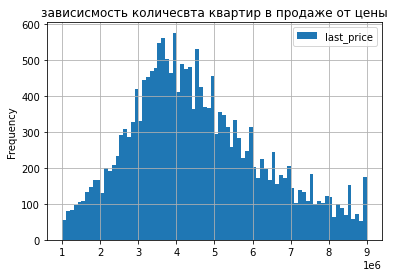

In [36]:
df.plot(kind='hist', y='last_price', title='зависисмость количесвта квартир в продаже от цены', ylabel='Кол-во квартир', xlabel='Цена в млн', bins=80, range=(1000000, 9000000), grid=True)

In [37]:
df = df.query('1000000 < last_price < 15000000') #оставляем срез со значениями от 1 до 15 млн руб

**Вывод**: исследуя гистограмму, можно сказать, что наибольшее количество предложений составляют квартиры стоимостью от 3 до 5 миллионов рублей. Также были отсечены значения с ценой, меньшей 1 и большей 15 млн руб, так как количество таких квартир достаточно мало и я сочла это за аномалии.

In [38]:
df['rooms'].describe()

count    21927.000000
mean         1.975282
std          0.945438
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

<AxesSubplot:title={'center':'зависисмость количесвта квартир в продаже от количества комнат'}, ylabel='Frequency'>

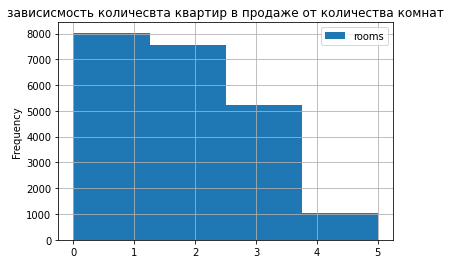

In [39]:
df.plot(kind='hist', y='rooms', title='зависисмость количесвта квартир в продаже от количества комнат', ylabel='Кол-во квартир', xlabel='Кол-во комнат', bins=4, range=(0, 5), grid=True)

**Вывод**: исследуя гистограмму, можно сказать, что наибольшее количество предложений составляют однокомнатные квартиры. Также видно, что чем больше комнат, тем меньше предложений. Квартиры с 0 комнат отсекать не стала, т.к. можно предположить, что это квартиры-студии.

In [40]:
df['ceiling_height'].describe()

count    21927.000000
mean         2.681640
std          0.225916
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:title={'center':'зависисмость количесвта квартир в продаже от высоты потолков'}, ylabel='Frequency'>

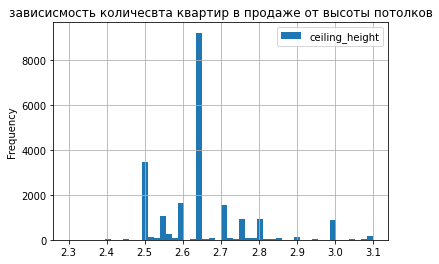

In [41]:
df.plot(kind='hist', y='ceiling_height', title='зависисмость количесвта квартир в продаже от высоты потолков', ylabel='Кол-во квартир', xlabel='Высота потолков', bins=50, range=(2.3, 3.1), grid=True)

**Вывод**: исследуя гистограмму, можно сказать, что наибольшее количество предложений составляют квартиры с высотой потолков около 2.65 метров. Аномальные значения были изменены ранее.

<AxesSubplot:title={'center':'Распеределение предложений в зависимости от этажа'}>

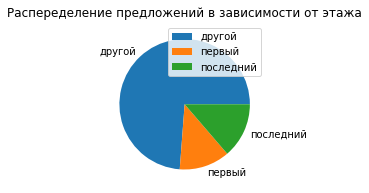

In [42]:
df.pivot_table(index='type_floor', values='last_price', aggfunc='count').plot(kind='pie', title='Распеределение предложений в зависимости от этажа', y='last_price', ylabel = '', figsize=(3,3))

**Вывод**: исследуя диаграмму, можно сказать, что количество предложений у квартир, располагающихся на первом и на последнем этажах примерно одинаково, а большую часть предложений составляют другие этажи.

In [43]:
df['floors_total'].describe()

count    21927.000000
mean        10.840835
std          6.635706
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:title={'center':'Зависимость количества квартир в продаже от количества этажей в доме'}, ylabel='Frequency'>

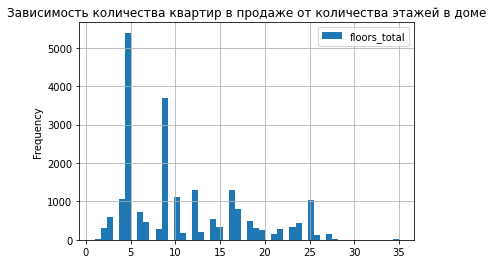

In [44]:
df.plot(kind='hist', y='floors_total', title='Зависимость количества квартир в продаже от количества этажей в доме', ylabel='Кол-во квартир', xlabel='Кол-во этажей', bins=50, range=(1,35), grid=True)

In [45]:
df = df.query('1 < floors_total < 35') #оставляем срез со значениями от 1 до 35 этажей

**Вывод**: исследуя гистограмму, можно сказать, что наибольшее количество предложений составляют квартиры в 5- и 9-этажных домах. Также были отсечены значения выше 35 этажей, так как количество таких квартир достаточно мало и я сочла это за аномалии.

In [46]:
df['city_centers_nearest'].describe()

count    16670.000000
mean     14695.478224
std       8555.617664
min        208.000000
25%      10240.000000
50%      13390.000000
75%      16527.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

<AxesSubplot:title={'center':'Зависимость количества квартир в продаже от расстояния от центра'}, ylabel='Frequency'>

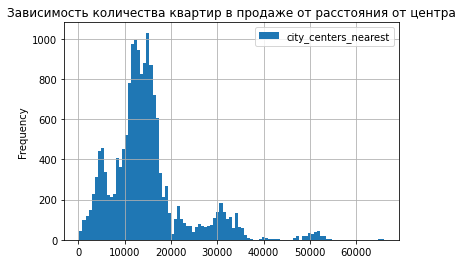

In [47]:
df.plot(kind='hist', y='city_centers_nearest', title='Зависимость количества квартир в продаже от расстояния от центра', ylabel='Кол-во квартир', xlabel='Расстояние от центра в метрах', bins=100, range=(208,65968), grid=True)

**Вывод**: из гистограммы видно, что наибольшее количество предложений наблюдается у квартир с удаленностью от центра около 10000-17000 метров. Также достаточно велико значение около 5000 метров. 

In [48]:
df['parks_nearest'].describe()

count    7097.000000
mean      491.508525
std       334.272666
min         1.000000
25%       292.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:title={'center':'Зависимость количества квартир в продаже от расстояния до парка'}, ylabel='Frequency'>

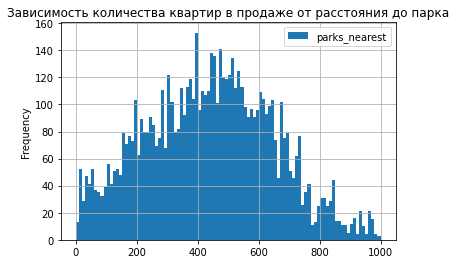

In [49]:
df.plot(kind='hist', y='parks_nearest', title='Зависимость количества квартир в продаже от расстояния до парка', ylabel='Кол-во квартир', xlabel='Расстояние до ближайшего парка', bins=100, range=(1,1000), grid=True)

**Вывод**: из гистограммы видно, что удаленность от парка не сильно влияет на количество предложений квартир, однако среднее растояние квартиры до парка составляет 200-600 метров. Квартиры, находящиеся более, чем в километре от ближайшего парка, встречаются реже.

In [50]:
shape_2 = df.shape #посчитаем количество строк и стобцов после фильтрации
shape_2

(21878, 28)

In [51]:
share_after_filtering = shape_2[0] / shape_1[0] #создаем переменную с долей от изначального кол-ва данных
share_after_filtering

0.9231613148234102

**Вывод**: была получена доля от изначальных данных после фильтрации. Так как у нас осталось 92.5% от изначального числа данных, можно считать анализ актуальным.

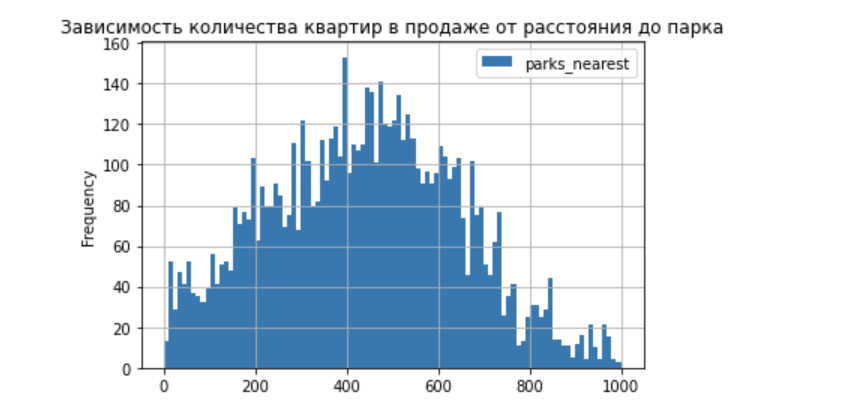

#### 2. Изучим, как быстро продавались квартиры

In [52]:
df['days_exposition'].describe()

count    19159.000000
mean       175.917323
std        214.817338
min          1.000000
25%         44.000000
50%         92.000000
75%        223.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:title={'center':'Зависимость количества продаж квартир от времени'}, ylabel='Frequency'>

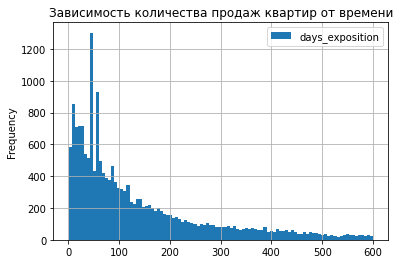

In [53]:
df.plot(kind='hist', y='days_exposition', title='Зависимость количества продаж квартир от времени', ylabel='Кол-во объявлений о продаже', xlabel='Кол-во дней в продаже', range=(1,600), bins=100, grid=True)

<AxesSubplot:>

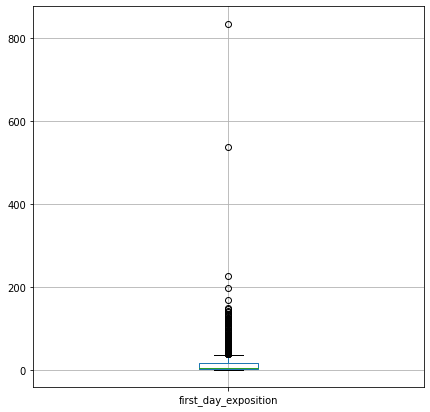

In [54]:
df.pivot_table(index='days_exposition', values='first_day_exposition', aggfunc='count').boxplot(grid=True, figsize=(7,7))

<AxesSubplot:>

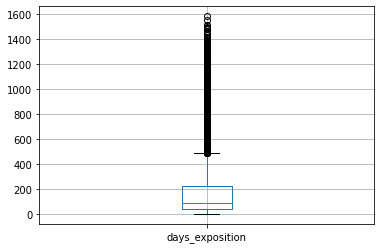

In [74]:
# Код ревьюера
df.boxplot(column = 'days_exposition')

In [75]:
# Код ревьюера
df.days_exposition.describe()

count    19159.000000
mean       175.917323
std        214.817338
min          1.000000
25%         44.000000
50%         92.000000
75%        223.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Вывод**: среднее время продажи квартиры составляет 176 дней, а медианное - 93 дня. Для анализа лучше ориентироваться на медианное значение, т.к. оно устойчиво к различным выбросам. Также из гистограммы видно, что большинство квартир было продано спустя примерно 50 дней после публикации объявления - значения до этого можно считать быстрыми продажами. Куда реже встречаются квартиры, которые продаются дольше 200 дней - это можно считать долгими продажами.

Из диаграммы размаха видно, что основные продажи происходят в диапазоне от 50 до 150 дней.

#### 3. Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта.

<AxesSubplot:title={'center':'Зависимость цены от общей площади'}, xlabel='Общая площадь', ylabel='Цена'>

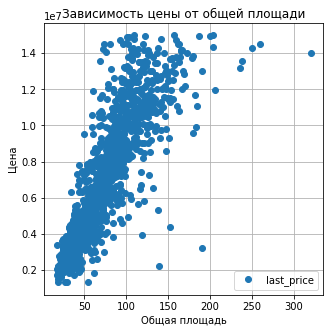

In [56]:
df.pivot_table(index='total_area', values='last_price').plot(title='Зависимость цены от общей площади', ylabel='Цена', xlabel='Общая площадь', style='o', grid=True, figsize=(5,5))

**Вывод**: судя по графику, можно увидеть, что между общей площадью и ценой за квартиру есть сильная линейная зависимость - чем больше площадь, тем выше цена.

<AxesSubplot:title={'center':'Зависимость цены от жилой площади'}, xlabel='Жилая площадь', ylabel='Цена'>

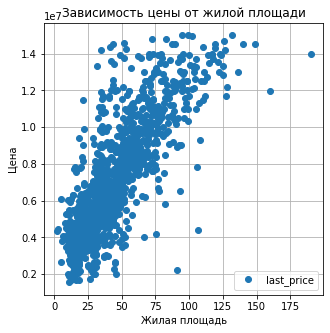

In [57]:
df.pivot_table(index='living_area', values='last_price').plot(title='Зависимость цены от жилой площади', ylabel='Цена', xlabel='Жилая площадь', style='o', grid=True, figsize=(5,5))

**Вывод**: судя по графику, можно увидеть, что между жилой площадью и ценой за квартиру есть некоторая линейная зависимость - чем больше площадь, тем выше цена. Однако, зависимость не настолько сильная, как с общей площадью и есть выбивающиеся значения.

<AxesSubplot:title={'center':'Зависимость цены от площади кухни'}, xlabel='Площадь кухни', ylabel='Цена'>

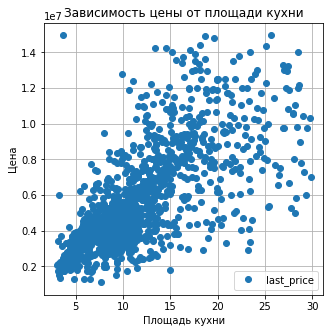

In [58]:
df.pivot_table(index='kitchen_area', values='last_price').plot(title='Зависимость цены от площади кухни', ylabel='Цена', xlabel='Площадь кухни', style='o', grid=True, figsize=(5,5))

**Вывод**: из графика видно, что площадь кухни коррелируют с ценой за квартиру не так сильно, как предыдущие показатели. Однако прослеживается закономерность, что чаще цена квартиры выше при большей площади кухни. 

<AxesSubplot:title={'center':'Зависимость цены от количества комнат'}, xlabel='Кол-во комнат', ylabel='Цена'>

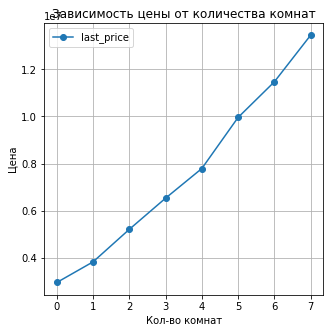

In [59]:
df.pivot_table(index='rooms', values='last_price').plot(title='Зависимость цены от количества комнат', ylabel='Цена', xstyllabel='Кол-во комнат', e='o-', grid=True, figsize=(5,5))

**Вывод**: зависимость между ценой и количеством комнат есть - чем больше в квартире комнат, тем выше она ценится.

<AxesSubplot:title={'center':'Зависимость цены от этажа'}, xlabel='Этаж', ylabel='Цена'>

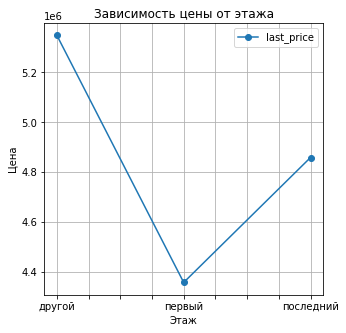

In [60]:
df.pivot_table(index='type_floor', values='last_price').plot(title='Зависимость цены от этажа', ylabel='Цена', xlabel='Этаж', style='o-', grid=True, figsize=(5,5))

**Вывод**: прямой зависимости между ценой и типом этажа не наблюдается. Понятно лишь то, что квартиры не на первом и не на последнем этажах ценятся выше.

<AxesSubplot:title={'center':'Зависимость цены от дня публикации'}, xlabel='День', ylabel='Цена в млн'>

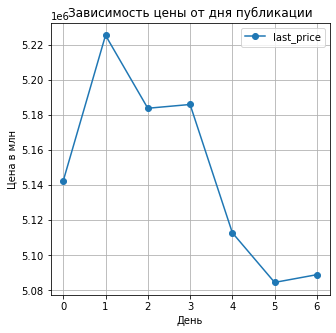

In [61]:
df.pivot_table(index='day_of_publication', values='last_price').plot(title='Зависимость цены от дня публикации', ylabel='Цена в млн', xlabel='День', style='o-', grid=True, figsize=(5,5))

**Вывод**: судя по графику, зависимости между ценой и днем публикации нет, так как никакой общей закономерности не наблюдается.

<AxesSubplot:title={'center':'Зависимость цены от месяца публикации'}, xlabel='Месяц', ylabel='Цена в млн'>

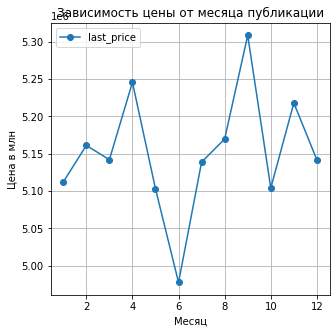

In [62]:
df.pivot_table(index='month_of_publication', values='last_price').plot(title='Зависимость цены от месяца публикации', ylabel='Цена в млн', xlabel='Месяц', style='o-', grid=True, figsize=(5,5))

**Вывод**: опять же можно заметить, что прямой зависимости между ценой и месяцем публикации нет, так как никакой общей закономерности не наблюдается.

<AxesSubplot:title={'center':'Зависимость цены от года публикации'}, xlabel='Год', ylabel='Цена в млн'>

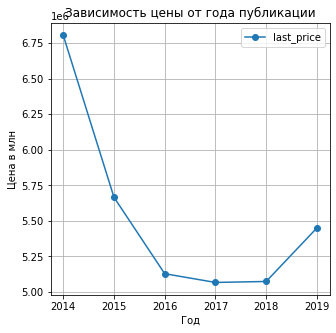

In [63]:
df.pivot_table(index='year_of_publication', values='last_price').plot(title='Зависимость цены от года публикации', ylabel='Цена в млн', xlabel='Год', style='o-', grid=True, figsize=(5,5))

<AxesSubplot:title={'center':'Зависимость цены от года публикации'}, xlabel='Год', ylabel='Общая площадь'>

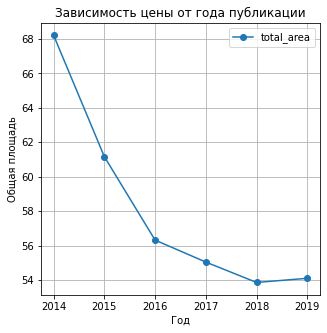

In [64]:
df.pivot_table(index='year_of_publication', values='total_area').plot(title='Зависимость цены от года публикации', ylabel='Общая площадь', xlabel='Год', style='o-', grid=True, figsize=(5,5))

**Вывод**: по этому графикам нельзя отследить прямую зависимость между ценой и годом публикации, но можно заметить, что в 2016-2018 годах наблюдаются самые низкие показатели. На первый взгляд, можно подумать, что цена за квартиры понизилась, но из второго графика видно, что в эти годы просто чаще продавались квартиры с меньшей площадью, отсюда и цена ниже.

In [65]:
df.corr().sort_values(by='last_price', ascending=False)['last_price'].head() #построили матрицу корреляции для всего столбца с ценой

last_price                1.000000
total_area                0.742184
living_area               0.639657
price_per_square_meter    0.608519
kitchen_area              0.556615
Name: last_price, dtype: float64

**Вывод**: из полученных данных, можно сделать вывод, что стоимость линейно зависит от общей и жилой площади (сильнее всего), от цены за квадратный метр и от площади кухни (слабая зависимость).

#### 4. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21878 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             21878 non-null  int64         
 1   last_price               21878 non-null  int64         
 2   total_area               21878 non-null  float64       
 3   first_day_exposition     21878 non-null  datetime64[ns]
 4   rooms                    21878 non-null  int64         
 5   ceiling_height           21878 non-null  float64       
 6   floors_total             21878 non-null  int64         
 7   living_area              20215 non-null  float64       
 8   floor                    21878 non-null  int64         
 9   is_apartment             21878 non-null  bool          
 10  studio                   21878 non-null  bool          
 11  open_plan                21878 non-null  bool          
 12  kitchen_area             21878 n

In [67]:
mean_price = df.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['count', 'mean'])
mean_price.columns = ['count', 'mean']
mean_price.sort_values(by='count', ascending=False).round(2).head(10)

,count,mean
locality_name,,
санкт-петербург,14299,106970.18
мурино,549,85554.40
шушары,436,78606.07
всеволожск,393,67154.04
пушкин,343,100793.63
колпино,337,75333.30
парголово,326,90332.26
гатчина,305,68865.90
кудрово,298,92542.25


In [68]:
print(mean_price.sort_values(by='mean', ascending=False).round(2).head())
print(mean_price.sort_values(by='mean').round(2).head())

                 count       mean
locality_name                    
санкт-петербург  14299  106970.18
зеленогорск         21  100897.25
пушкин             343  100793.63
 лисий нос           3  100660.81
сестрорецк         172  100608.64
               count      mean
locality_name                 
 житково           1  15648.29
  никольский       3  19577.33
бокситогорск       2  19600.14
 оредеж            1  19877.68
  вещево           1  20366.97


**Вывод**: наибольшее число объявлений в Санкт-Петербурге, после него идут Мурино и Шушары, а завершает десятку лидеров Выборг с показателем в 230 объявлений. Также я распечатала по пятерке населенных пунктов - с самыми дорогими (лидер-Питер) и самыми дешевыми (лидер-Житково) ценами за квадратный метр.

In [69]:
df.dtypes

total_images                        int64
last_price                          int64
total_area                        float64
first_day_exposition       datetime64[ns]
rooms                               int64
ceiling_height                    float64
floors_total                        int64
living_area                       float64
floor                               int64
is_apartment                         bool
studio                               bool
open_plan                            bool
kitchen_area                      float64
balcony                             int64
locality_name                      object
airports_nearest                  float64
city_centers_nearest              float64
parks_around3000                  float64
parks_nearest                     float64
ponds_around3000                  float64
ponds_nearest                     float64
days_exposition                   float64
price_per_square_meter            float64
day_of_publication                

<AxesSubplot:title={'center':'Зависимость цены от удаленности от центра'}, xlabel='Удаленность в км', ylabel='Цена в млн'>

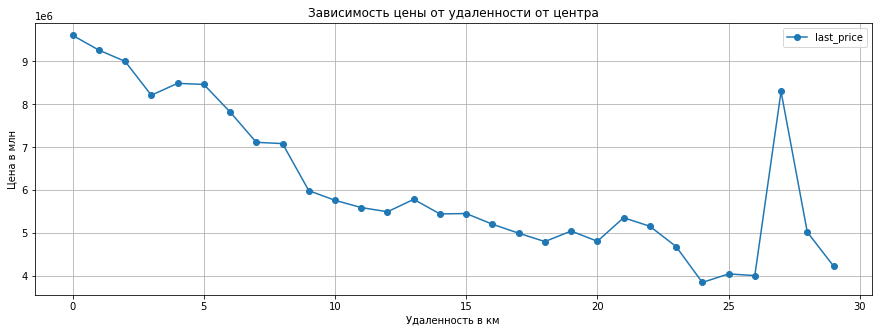

In [70]:
(
    df.query('locality_name == "санкт-петербург"')
    .pivot_table(index='city_centers_nearest_km', values='last_price')
    .plot(title='Зависимость цены от удаленности от центра', ylabel='Цена в млн', xlabel='Удаленность в км', style='o-', grid=True, figsize=(15, 5))
)

#### 5. Теперь вычислим среднюю стоимость квартир в Санкт-Петербурге на разном удалении от центра.

In [71]:
df.query('locality_name == "санкт-петербург" and city_centers_nearest_km <= 15').pivot_table(index='city_centers_nearest_km', values='last_price')

,last_price
city_centers_nearest_km,
0.0,9.606154e+06
1.0,9.263000e+06
2.0,9.000722e+06
3.0,8.212143e+06
4.0,8.489422e+06
5.0,8.463717e+06
6.0,7.823787e+06
7.0,7.116608e+06
8.0,7.086418e+06


**Вывод**: из графика и таблицы можно сделать вывод, что чем ближе квартира находится к центру, тем она дороже стоит. Средняя цена квартир в в центре составляет 9606154 миллиона рублей, когда в 10 километрах цена уже 5766188 миллиона рублей. То есть, разница в 10 км может изменить цену больше, чем в 1.5 раза.

### Общие выводы по проекту

В процессе иследовательского анализа данных были выполнены следующие этапы, а также сделаны выводы по ним:

1. Изучили общую информацию о данных
 - в данных 23699 строки, в некоторых столбцах имеются пропущенные значения, а также не всегда правильно определен тип данных
 - судя по гистограммам, встречаются аномальные значения, но в целом данные готовы для дальнейшего исследования
2. Выполнили предобработку данных
 - исправили название столбцов, чтобы был стиль змеиного регистра
 - поменяли в некоторых стобцах тип данных на более подходящий
 - округлили значения
 - избавились от пропущенных значений, где это предоставлялось возможным - логически пришли к выводу, на что менять пропуск (неизвестное значение/ноль/медианное значение и т.д.)
 - избавились от аномалий в стобце ceiling_hight
3. Добавили новые стобцы в таблицу
 - price_per_square_meter - цена одного квадратного метра
 - day_of_publication - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
 - month_of_publication - месяц публикации объявленя 
 - year_of_publication - год публикации объявления
 - type_floor - тип этажа квартиры (значения — «первый», «последний», «другой»)
 - city_centers_nearest_km - расстояние до центра города в километрах
4. Провели исследовательский анализ данных
 * Изучены некоторые параметры объектов
  - Чаще всего встречаются предложения квартир с общей площадью 45 квадратных метров с кухней в 6 квадратных метров, с одной или двумя комнатами, с высотой потолков 2.65м, не на первом и не на последнем этажах в 5- или 9-этажном доме в 5-15 км от центра города.
 * Изучили, как быстро продавались квартиры
   -  среднее время продажи квартиры составляет 176 дней, а медианное - 93 дня. Для анализа лучше ориентироваться на медианное значение, т.к. оно устойчиво к различным выбросам.
   -  большинство квартир было продано спустя примерно 50 дней после публикации объявления - значения до этого можно считать быстрыми продажами. Куда реже встречаются квартиры, которые продаются дольше 200 дней - это можно считать долгими продажами. В среднем квартиры продаются от 50 до 150 дней.
 * Определили факторы, которые больше всего влияют на общую (полную) стоимость объекта
   - между общей площадью и ценой за квартиру есть сильная линейная зависимость - чем больше площадь, тем выше цена.
   - между жилой площадью и ценой за квартиру есть некоторая линейная зависимость - чем больше площадь, тем выше цена. Однако, зависимость не настолько сильная, как с общей площадью и есть выбивающиеся значения.
   - площадь кухни коррелируют с ценой за квартиру не так сильно, как предыдущие показатели. Однако прослеживается закономерность, что чаще цена квартиры выше при большей площади кухни.
   - а также заметно, что чем больше комнат, тем выше ценится квартира.
 * Посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
   - наибольшее число объявлений в Санкт-Петербурге, после него идут Мурино и Шушары, а завершает десятку лидеров Выборг с показателем в 230 объявлений. Также были определены по пятерке населенных пунктов - с самыми дорогими (лидер-Питер) и самыми дешевыми (лидер-Житково) ценами за квадратный метр.
 * Вычислили среднюю стоимость квартир в Санкт-Петербурге на разном удалении от центра
   - чем ближе квартира находится к центру, тем дороже она стоит. Средняя цена квартир в центре составляет 9606154 миллиона рублей, когда в 10 километрах цена уже 5766188 миллиона рублей. То есть, разница в 10 км может изменить цену больше, чем в 1.5 раза.